In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
# Load CSV file into a DataFrame
file_path = '/content/GlobalLandTemperaturesByCity.csv'  # Replace 'your_file.csv' with the actual path to your CSV file
data = pd.read_csv(file_path)


In [ ]:
print(data.head())

           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  


In [ ]:
data.info

<bound method DataFrame.info of                dt  AverageTemperature  AverageTemperatureUncertainty  \
0      1743-11-01               6.068                          1.737   
1      1743-12-01                 NaN                            NaN   
2      1744-01-01                 NaN                            NaN   
3      1744-02-01                 NaN                            NaN   
4      1744-03-01                 NaN                            NaN   
...           ...                 ...                            ...   
69606  1916-12-01              25.551                          0.573   
69607  1917-01-01              25.449                          0.567   
69608  1917-02-01              25.253                          0.274   
69609  1917-03-01              25.751                          0.426   
69610  1917-04-01              25.820                            NaN   

           City    Country Latitude Longitude  
0         Århus    Denmark   57.05N    10.33E  
1      

In [ ]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...,...
69606,1916-12-01,25.551,0.573,Adiwerna,Indonesia,7.23S,109.46E
69607,1917-01-01,25.449,0.567,Adiwerna,Indonesia,7.23S,109.46E
69608,1917-02-01,25.253,0.274,Adiwerna,Indonesia,7.23S,109.46E
69609,1917-03-01,25.751,0.426,Adiwerna,Indonesia,7.23S,109.46E


In [ ]:
data.isnull().sum()

dt                                  0
AverageTemperature               3021
AverageTemperatureUncertainty    3022
City                                1
Country                             1
Latitude                            2
Longitude                           3
dtype: int64

In [ ]:
# Mean imputation
data.fillna(data.mean(), inplace=True)

# Display the updated DataFrame with missing values filled using mean imputation
print("\nDataFrame after mean imputation:")
print(data)


DataFrame after mean imputation:
               dt  AverageTemperature  AverageTemperatureUncertainty  \
0      1743-11-01            6.068000                       1.737000   
1      1743-12-01           15.675517                       1.096238   
2      1744-01-01           15.675517                       1.096238   
3      1744-02-01           15.675517                       1.096238   
4      1744-03-01           15.675517                       1.096238   
...           ...                 ...                            ...   
69606  1916-12-01           25.551000                       0.573000   
69607  1917-01-01           25.449000                       0.567000   
69608  1917-02-01           25.253000                       0.274000   
69609  1917-03-01           25.751000                       0.426000   
69610  1917-04-01           25.820000                       1.096238   

           City    Country Latitude Longitude  
0         Århus    Denmark   57.05N    10.33E  
1    

<ipython-input-7-3a554d05f55f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
data.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             1
Country                          1
Latitude                         2
Longitude                        3
dtype: int64

In [ ]:
# Selecting numerical columns for PCA
numerical_columns = ['AverageTemperature', 'AverageTemperatureUncertainty', 'Latitude', 'Longitude']
X = data[numerical_columns]


In [ ]:
numeric_data = data[numerical_columns]

In [ ]:
# Dropping rows with missing values (NaN) if necessary
numeric_data = numeric_data.dropna()


In [ ]:
# Separating features for PCA
X = numeric_data.drop(['Latitude', 'Longitude'], axis=1)  # Exclude non-numeric columns


In [ ]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [ ]:
# Apply PCA
n_components = 2  # Number of principal components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

In [ ]:
# Create a new DataFrame with the principal components
columns = [f"PC{i+1}" for i in range(n_components)]
pca_df = pd.DataFrame(data=X_pca, columns=columns)

In [ ]:
# Display the first few rows of the PCA-transformed data
print("Top few rows of Data After PCA:")
print(pca_df.head())

Top few rows of Data After PCA:
        PC1       PC2
0  0.962443 -0.176312
1  0.000003 -0.000030
2  0.000003 -0.000030
3  0.000003 -0.000030
4  0.000003 -0.000030


In [ ]:
# Display the explained variance ratio
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.62763761 0.37236239]


In [ ]:

import matplotlib.pyplot as plt


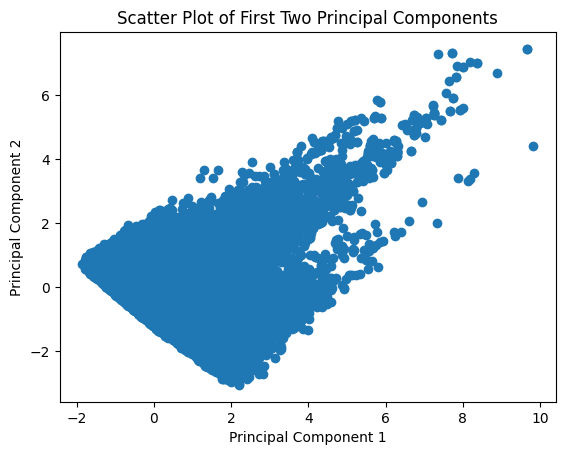

In [ ]:
# Scatter plot of the first two principal components
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
n_clusters = 3  # Replace with your chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)


In [ ]:
# Fit KMeans on the PCA-transformed data
clusters = kmeans.fit_predict(X_pca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters


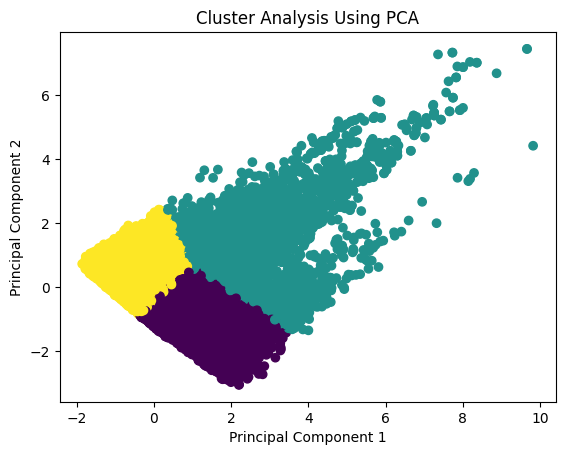

In [ ]:
# Visualize the clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Cluster Analysis Using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming pca_df['Cluster'] contains the cluster labels
silhouette_avg = silhouette_score(X_pca, pca_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.46223030129401194


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

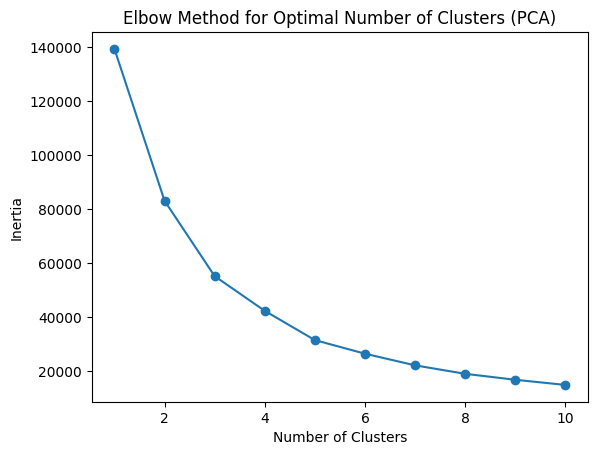

In [ ]:
# Use the elbow method to find the optimal number of clusters for PCA-transformed data
inertia_pca = []
for i in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia_pca.append(kmeans.inertia_)

# Plot the elbow curve for PCA-transformed data
plt.plot(range(1, 11), inertia_pca, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (PCA)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Enter the number of clusters for KMeans: 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


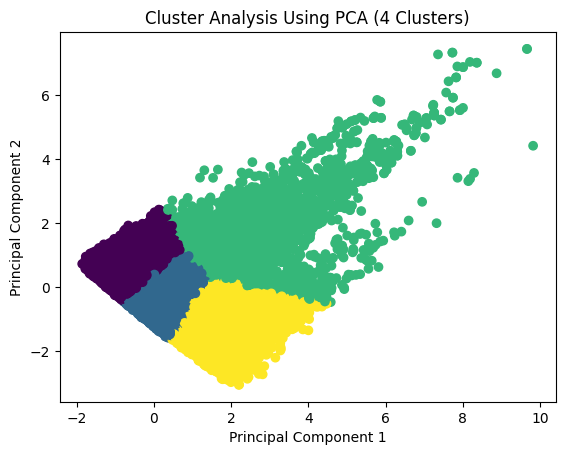

In [ ]:
# Take input for the number of clusters from the user
user_input = input("Enter the number of clusters for KMeans: ")
n_clusters = int(user_input)

# Perform KMeans clustering with the user-defined number of clusters
kmeans_user_input = KMeans(n_clusters=n_clusters, random_state=42)
clusters_user_input = kmeans_user_input.fit_predict(X_pca)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster_User_Input'] = clusters_user_input

# Visualize the clusters based on user input
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster_User_Input'], cmap='viridis')
plt.title(f'Cluster Analysis Using PCA ({n_clusters} Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Assuming pca_df['Cluster_User_Input'] contains the cluster labels based on user input
silhouette_avg_user_input = silhouette_score(X_pca, pca_df['Cluster_User_Input'])
print(f"Silhouette Score for {n_clusters} Clusters: {silhouette_avg_user_input}")

Silhouette Score for 4 Clusters: 0.4039932047528257


data set 2 by country


In [ ]:
# Load CSV file into a DataFrame
file_path = '/content/GlobalLandTemperaturesByCountry.csv'  # Replace 'your_file.csv' with the actual path to your CSV file
data = pd.read_csv(file_path)


NameError: name 'pd' is not defined

In [ ]:
print(data.head())

           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland


In [ ]:
data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
80383,1915-01-01,24.423,0.582,British Virgin Islands
80384,1915-02-01,24.282,0.788,British Virgin Islands
80385,1915-03-01,24.941,0.678,British Virgin Islands
80386,1915-04-01,25.254,0.555,British Virgin Islands


In [ ]:
data.isnull().sum()

dt                                  0
AverageTemperature               4457
AverageTemperatureUncertainty    3718
Country                             0
dtype: int64

In [ ]:
# Mean imputation
data.fillna(data.mean(), inplace=True)

# Display the updated DataFrame with missing values filled using mean imputation
print("\nDataFrame after mean imputation:")
print(data)


DataFrame after mean imputation:
               dt  AverageTemperature  AverageTemperatureUncertainty  \
0      1743-11-01            4.384000                       2.294000   
1      1743-12-01           17.695226                       0.991412   
2      1744-01-01           17.695226                       0.991412   
3      1744-02-01           17.695226                       0.991412   
4      1744-03-01           17.695226                       0.991412   
...           ...                 ...                            ...   
80383  1915-01-01           24.423000                       0.582000   
80384  1915-02-01           24.282000                       0.788000   
80385  1915-03-01           24.941000                       0.678000   
80386  1915-04-01           25.254000                       0.555000   
80387  1915-05-01           26.755000                       0.826000   

                      Country  
0                       Åland  
1                       Åland  
2    

<ipython-input-32-3a554d05f55f>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [ ]:
data.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [ ]:
# Selecting numerical columns for PCA
numerical_columns = ['AverageTemperature', 'AverageTemperatureUncertainty', 'Country', 'dt']
X = data[numerical_columns]

NameError: name 'data' is not defined

In [ ]:
numeric_data = data[numerical_columns]

In [ ]:
# Dropping rows with missing values (NaN) if necessary
numeric_data = numeric_data.dropna()


In [ ]:
# Separating features for PCA
X = numeric_data.drop(['Latitude', 'Longitude'], axis=1)  # Exclude non-numeric columns


In [ ]:
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [ ]:
# Apply PCA
n_components = 2  # Number of principal components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

In [ ]:
# Create a new DataFrame with the principal components
columns = [f"PC{i+1}" for i in range(n_components)]
pca_df = pd.DataFrame(data=X_pca, columns=columns)

In [ ]:
# Display the first few rows of the PCA-transformed data
print("Top few rows of Data After PCA:")
print(pca_df.head())

In [ ]:
# Display the explained variance ratio
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)

In [ ]:

import matplotlib.pyplot as plt

In [ ]:
# Scatter plot of the first two principal components
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
n_clusters = 3  # Replace with your chosen number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)


In [ ]:
# Fit KMeans on the PCA-transformed data
clusters = kmeans.fit_predict(X_pca)

In [ ]:

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters


In [ ]:
# Visualize the clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Cluster Analysis Using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming pca_df['Cluster'] contains the cluster labels
silhouette_avg = silhouette_score(X_pca, pca_df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

In [ ]:
# Use the elbow method to find the optimal number of clusters for PCA-transformed data
inertia_pca = []
for i in range(1, 11):  # Trying clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia_pca.append(kmeans.inertia_)

# Plot the elbow curve for PCA-transformed data
plt.plot(range(1, 11), inertia_pca, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters (PCA)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Take input for the number of clusters from the user
user_input = input("Enter the number of clusters for KMeans: ")
n_clusters = int(user_input)

# Perform KMeans clustering with the user-defined number of clusters
kmeans_user_input = KMeans(n_clusters=n_clusters, random_state=42)
clusters_user_input = kmeans_user_input.fit_predict(X_pca)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster_User_Input'] = clusters_user_input

# Visualize the clusters based on user input
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster_User_Input'], cmap='viridis')
plt.title(f'Cluster Analysis Using PCA ({n_clusters} Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
